<a href="https://colab.research.google.com/github/Bibhukalyan/LinearRegression/blob/main/Simple_Linear_Regression_IceCream_Sales_Pred_in_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING TASK #1: IMPORT KEY LIBRARIES AND DATASETS

In [ ]:
# Import key libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Note that you might need to upgrade Seaborn library
# You will need to restart the notebook again for the changes to take effect
!pip install --upgrade Seaborn


In [ ]:
# read the data using Pandas
icecream_sales_df = pd.read_csv('IceCreamData.csv')

In [ ]:
# View the DataFrame
icecream_sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
icecream_sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
icecream_sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
# Note that we are using AWS SageMaker 2.72.1
# We will be using the new SageMaker 2.x SDK
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.10
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2024.12.16.0.35.48
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.3.0
audioread        

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
 - **Use head and tail methods to print the first and last 9 rows of the dataframe**

# CODING TASK #2: EXPLORE THE DATA

In [ ]:
icecream_sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
# Apply the describe method to obtain a statistical summary about your data
icecream_sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
 - **Find the minimimum revenue in the dataframe using two different methods**
 - **What is the revenue corresponding to maximum temperature?**

# CODING TASK #3: PERFORM DATA VISUALIZATION

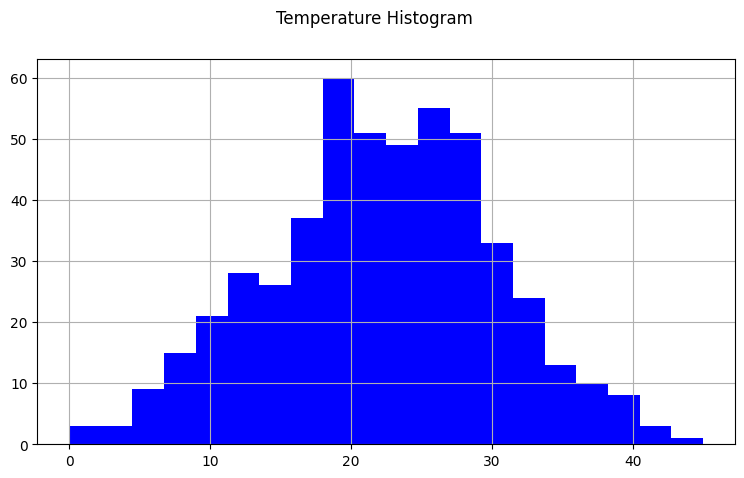

In [ ]:
fig = plt.figure();
icecream_sales_df['Temperature'].hist(bins = 20, figsize = (9, 5), color = 'b');
fig.suptitle('Temperature Histogram');

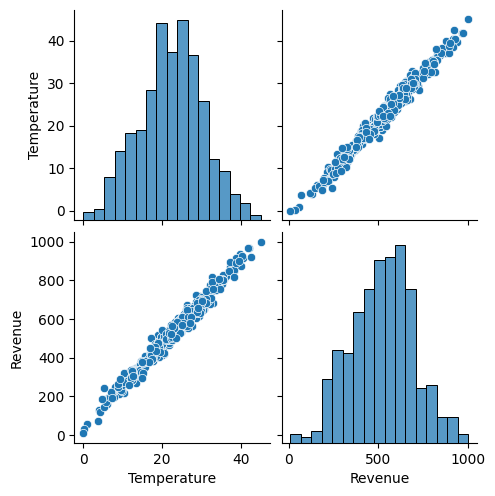

In [ ]:
# plot pairplot
sns.pairplot(icecream_sales_df);

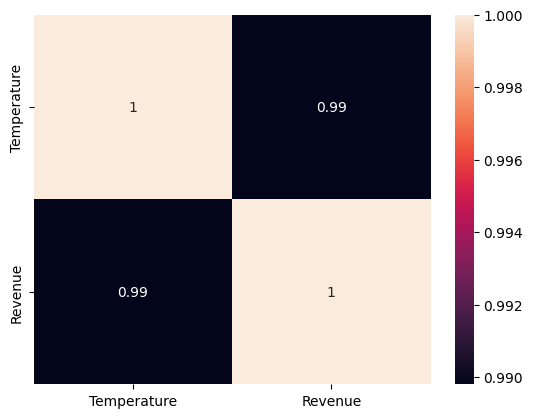

In [ ]:
# PLot the correlation Matrix
corr_matrix = icecream_sales_df.corr()
sns.heatmap(corr_matrix, annot = True);
plt.show()

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
 - **Plot the histogram of the sales revenue using 25 bins**
 - **Set the histogram color to green**

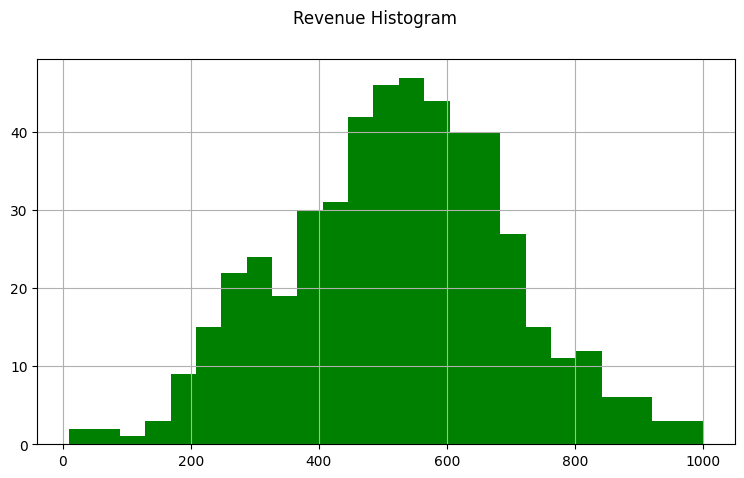

In [ ]:
fig = plt.figure();
icecream_sales_df['Revenue'].hist(bins = 25, figsize = (9, 5), color = 'g');
fig.suptitle('Revenue Histogram');

# CODING TASK #4: PREPARE THE DATA FOR MODEL TRAINING

In [ ]:
# Separate the data into input X and Output y
X = icecream_sales_df['Temperature']
y = icecream_sales_df['Revenue']

In [ ]:
# Separate the data into input X and Output y
X = icecream_sales_df[['Temperature']]
y = icecream_sales_df[['Revenue']]


In [ ]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [ ]:
# prompt: find the type of X

print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


In [ ]:
# Check out the shape of the input
X.shape

(500, 1)

In [ ]:
# Check out the shape of the output
y.shape

(500, 1)

In [ ]:
# Convert the datatype to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
# Only take the numerical variables and scale them
X

array([[24.566885 ],
       [26.005192 ],
       [27.790554 ],
       [20.595335 ],
       [11.503498 ],
       [14.352514 ],
       [13.70778  ],
       [30.833984 ],
       [ 0.97687  ],
       [31.669464 ],
       [11.455254 ],
       [ 3.6646695],
       [18.811825 ],
       [13.624509 ],
       [39.53991  ],
       [18.48314  ],
       [25.935375 ],
       [42.51528  ],
       [29.589481 ],
       [21.775948 ],
       [25.457836 ],
       [15.214569 ],
       [22.619316 ],
       [16.25872  ],
       [23.881725 ],
       [18.9783   ],
       [15.661465 ],
       [29.185045 ],
       [19.02461  ],
       [35.12015  ],
       [24.183937 ],
       [15.23119  ],
       [ 8.790953 ],
       [18.233229 ],
       [35.628925 ],
       [37.05754  ],
       [22.28455  ],
       [17.517075 ],
       [31.737919 ],
       [17.049738 ],
       [23.003489 ],
       [ 8.755554 ],
       [18.775358 ],
       [14.109661 ],
       [18.633913 ],
       [15.676487 ],
       [20.947914 ],
       [30.63

In [ ]:
y

array([[ 534.799  ],
       [ 625.1901 ],
       [ 660.63226],
       [ 487.70697],
       [ 316.2402 ],
       [ 367.94073],
       [ 308.89453],
       [ 696.7166 ],
       [  55.39034],
       [ 737.80084],
       [ 325.9684 ],
       [  71.16016],
       [ 467.44672],
       [ 289.54092],
       [ 905.4776 ],
       [ 469.90903],
       [ 648.21   ],
       [ 921.5083 ],
       [ 649.56116],
       [ 534.62286],
       [ 612.15393],
       [ 353.32562],
       [ 524.23615],
       [ 374.23114],
       [ 523.1246 ],
       [ 473.60434],
       [ 402.45532],
       [ 679.3178 ],
       [ 517.53406],
       [ 809.67206],
       [ 528.38043],
       [ 356.09802],
       [ 237.76392],
       [ 418.13727],
       [ 809.46344],
       [ 870.7659 ],
       [ 550.2785 ],
       [ 405.66144],
       [ 740.93567],
       [ 501.733  ],
       [ 539.688  ],
       [ 242.2362 ],
       [ 421.6215 ],
       [ 358.00284],
       [ 467.63107],
       [ 396.93564],
       [ 500.92508],
       [ 651.

In [ ]:
# split the data into training and testing using SkLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
 - **Split the data into 70% for training and the rest for testing**
 - **Verify that the split was successful**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape

(400, 1)

# CODING TASK #5: TRAIN A SIMPLE LINEAR REGRESSION MODEL USING SCIKIT LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [ ]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [ ]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9709950685501099

In [ ]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[21.533463]]
Linear Model Coefficient (b):  [42.911102]


**PRACTICE OPPORTUNITY #5 [OPTIONAL]:**
- **Retrain the model while setting the fit_intercept = False, what do you notice?**

In [ ]:
regresssion_model_sklearn = LinearRegression(fit_intercept = False)
regresssion_model_sklearn.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.972470760345459

In [ ]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[23.180834]]
Linear Model Coefficient (b):  0.0


# CODING TASK #6: ASSESS TRAINED MODEL PERFORMANCE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [ ]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [ ]:
y_predict

array([[706.6693 ],
       [364.31967],
       [814.1733 ],
       [436.37125],
       [486.5178 ],
       [570.5055 ],
       [634.0086 ],
       [ 98.45493],
       [697.8519 ],
       [859.8078 ],
       [674.78705],
       [849.8618 ],
       [444.199  ],
       [460.55722],
       [694.407  ],
       [231.33806],
       [719.6249 ],
       [113.08232],
       [432.32568],
       [141.62144],
       [588.7456 ],
       [639.4835 ],
       [503.94342],
       [575.84235],
       [581.0523 ],
       [687.656  ],
       [575.463  ],
       [753.1868 ],
       [436.29465],
       [377.8507 ],
       [525.9877 ],
       [758.7806 ],
       [612.06995],
       [353.971  ],
       [467.21225],
       [289.1657 ],
       [704.8732 ],
       [288.94467],
       [458.32135],
       [465.9639 ],
       [583.69446],
       [445.556  ],
       [640.7923 ],
       [299.80994],
       [429.35757],
       [474.3499 ],
       [589.8383 ],
       [515.25604],
       [670.5912 ],
       [735.9718 ],


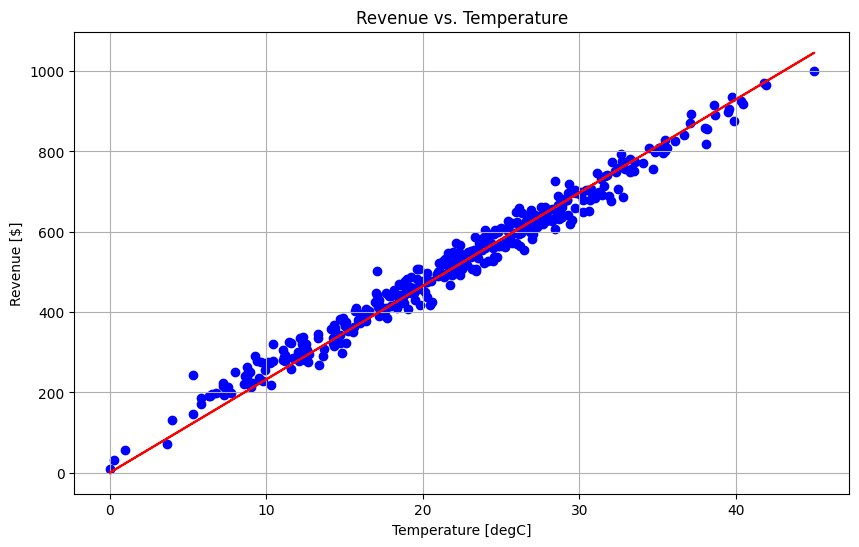

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue vs. Temperature')
plt.grid()

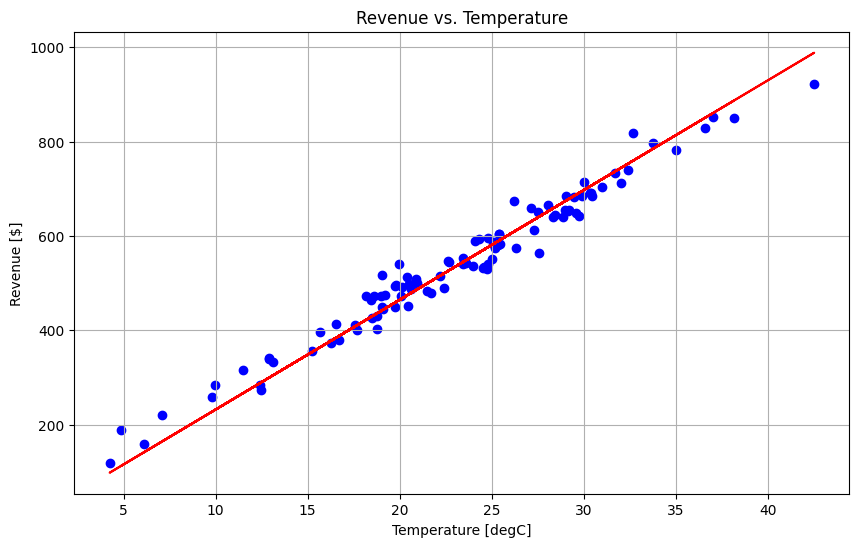

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, regresssion_model_sklearn.predict(X_test), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue vs. Temperature')
plt.grid()

**PRACTICE OPPORTUNITY #6 [OPTIONAL]:**
- **Use the trained model, obtain the revenue when the outside air temperature is 35 degC and 10 degC?**
- **Perform a sanity check to examine if these results make sense!**

In [ ]:
x_test_rand = np.array([[10], [35]])
y_predict_rand = regresssion_model_sklearn.predict(x_test_rand)
print(y_predict_rand)

[[232.39879608]
 [813.39578629]]


# GREAT JOB!

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
 - **Use head and tail methods to print the first and last 9 rows of the dataframe**

In [ ]:
icecream_sales_df.head(9)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338


In [ ]:
icecream_sales_df.tail(9)

,Temperature,Revenue
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


**PRACTICE OPPORTUNITY #2 SOLUTION:**
 - **Find the minimimum revenue in the dataframe using two different methods**
 - **What is the revenue corresponding to maximum temperature?**

In [ ]:
icecream_sales_df.describe()

In [ ]:
icecream_sales_df['Revenue'].min()

In [ ]:
icecream_sales_df[icecream_sales_df ['Temperature'] == icecream_sales_df['Temperature'].max()]

**PRACTICE OPPORTUNITY #3 SOLUTION:**
 - **Plot the histogram of the sales revenue using 25 bins**
 - **Set the histogram color to green**

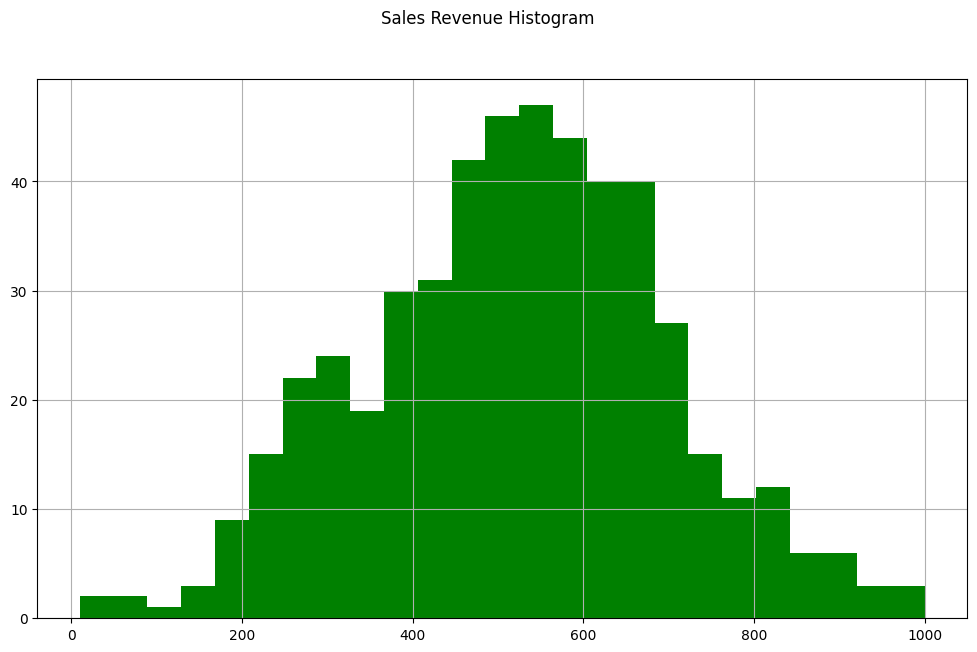

In [ ]:
fig = plt.figure();
icecream_sales_df['Revenue'].hist(bins = 25, figsize = (12, 7), color = 'g');
fig.suptitle('Sales Revenue Histogram');

**PRACTICE OPPORTUNITY #4 SOLUTION:**
 - **Split the data into 70% for training and the rest for testing**
 - **Verify that the split was successful**

In [ ]:
# split the data into training and testing using SkLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
X_train

**PRACTICE OPPORTUNITY #5 SOLUTION:**
- **Retrain the model while setting the fit_intercept = False, what do you notice?**

In [ ]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = False)
regresssion_model_sklearn.fit(X_train, y_train)

regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

**PRACTICE OPPORTUNITY #6 SOLUTION:**
- **Use the trained model, obtain the revenue when the outside air temperature is 35 degC and 10 degC?**
- **Perform a sanity check to examine if these results make sense!**

In [ ]:
temperature = [[10]]
revenue = regresssion_model_sklearn.predict(temperature)
print(revenue)

temperature = [[35]]
revenue = regresssion_model_sklearn.predict(temperature)
print(revenue)

[[231.80833817]]
[[811.32918358]]
